### Explanatory Data Analysis on 2018 US flight data

In [1]:
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import the data from csv
df=pd.read_csv('fd.csv')


In [5]:
#first look on rows and columns 
print ((df.shape))

(2319612, 19)


The dataset contains2319612 rows and 19 columns.

In [6]:
print ("There is a total of {} flights in the dataset." .format(len(df.index)))

There is a total of 2319612 flights in the dataset.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319612 entries, 0 to 2319611
Data columns (total 19 columns):
Year                int64
Month               int64
DayofMonth          int64
DayOfWeek           int64
UniqueCarrier       object
Origin              object
Dest                object
Distance            int64
Cancelled           int64
CancellationCode    object
Code                object
Description         object
iata                object
airport             object
city                object
state               object
country             object
lat                 float64
long                float64
dtypes: float64(2), int64(6), object(11)
memory usage: 238.9+ MB


The data is composed of integers, objects and floats. The memory usage is 336.2+ MB. 


In [8]:
df.head()


,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,Distance,Cancelled,CancellationCode,Code,Description,iata,airport,city,state,country,lat,long
0,2008,1,1,2,XE,EWR,MYR,550,0,NaN,XE,Expressjet Airlines Inc.,EWR,Newark Intl,Newark,NJ,USA,40.692497,-74.168661
1,2008,1,1,2,XE,AUS,ONT,1197,0,NaN,XE,Expressjet Airlines Inc.,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872
2,2008,1,1,2,XE,ONT,MCI,1318,0,NaN,XE,Expressjet Airlines Inc.,ONT,Ontario International,Ontario,CA,USA,34.056000,-117.601194
3,2008,1,1,2,XE,FAT,ONT,222,0,NaN,XE,Expressjet Airlines Inc.,FAT,Fresno Yosemite International,Fresno,CA,USA,36.776194,-119.718139
4,2008,1,1,2,XE,ONT,ELP,670,0,NaN,XE,Expressjet Airlines Inc.,ONT,Ontario International,Ontario,CA,USA,34.056000,-117.601194


In [9]:
#is any row null?
df.isnull().any()

Year                False
Month               False
DayofMonth          False
DayOfWeek           False
UniqueCarrier       False
Origin              False
Dest                False
Distance            False
Cancelled           False
CancellationCode     True
Code                False
Description         False
iata                False
airport             False
city                 True
state                True
country             False
lat                 False
long                False
dtype: bool

The data contains Null values in the columns Cancellation Code, city and state. This is acceptable for the intended purpose so I will keep them. 

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2319612.0,2008.000000,0.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000
Month,2319612.0,6.343666,3.433463,1.000000,3.000000,6.000000,9.000000,12.000000
DayofMonth,2319612.0,15.727206,8.807478,1.000000,8.000000,16.000000,23.000000,31.000000
DayOfWeek,2319612.0,3.979993,1.997027,1.000000,2.000000,4.000000,6.000000,7.000000
Distance,2319612.0,812.030221,622.321614,11.000000,365.000000,640.000000,1034.000000,4962.000000
Cancelled,2319612.0,0.047514,0.212735,0.000000,0.000000,0.000000,0.000000,1.000000
lat,2319612.0,37.206219,5.924640,17.701889,33.640444,38.533963,41.066958,71.285448
long,2319612.0,-93.902916,17.520690,-176.646031,-104.667002,-87.904464,-81.316028,-64.798556


To summarize the first investigation, the data is very tidy and can easily be used for further analyis. 

In [11]:
#accessing the first data entry to see if there is any strange data to be seen 
print (df.iloc [358])

Year                                        2008
Month                                          1
DayofMonth                                     1
DayOfWeek                                      2
UniqueCarrier                                 XE
Origin                                       IAH
Dest                                         BRO
Distance                                     308
Cancelled                                      0
CancellationCode                             NaN
Code                                          XE
Description             Expressjet Airlines Inc.
iata                                         IAH
airport             George Bush Intercontinental
city                                     Houston
state                                         TX
country                                      USA
lat                                      29.9805
long                                    -95.3397
Name: 358, dtype: object


The Cancelation Code contains not NaN values. This needs to be fixed. 

In [12]:
# replace NaN values 
df.replace(np.nan, 0, inplace=True)

In [13]:
print (df.iloc [358])

Year                                        2008
Month                                          1
DayofMonth                                     1
DayOfWeek                                      2
UniqueCarrier                                 XE
Origin                                       IAH
Dest                                         BRO
Distance                                     308
Cancelled                                      0
CancellationCode                               0
Code                                          XE
Description             Expressjet Airlines Inc.
iata                                         IAH
airport             George Bush Intercontinental
city                                     Houston
state                                         TX
country                                      USA
lat                                      29.9805
long                                    -95.3397
Name: 358, dtype: object


Ok, looks good now. After I was using fillna I still got NaN, replace is the better choice in this case. 

### Investigation on the questions: 

    What are the airliners with the least cancellations?
    Which airports are the busiest ones? 
    Is there a timly insight on flight frequency over the months? 

In [14]:
# What is the proportion of cancelled flights to all flights?
print("the proportion of all canceled flight to all flights is:")
print(len(df[df.Cancelled != 0]) / float(len(df)))

the proportion of all canceled flight to all flights is:
0.047513549679860254


The overall cancellation rate of flights is 0.048 in 2018, nearly 5%.

In [15]:
# Trimming the value for US Airways - parentheses to be killed 
def remove_parenthetical_description(description):
    return description.split(' (')[0]

df.Description = df.Description.map(remove_parenthetical_description)

#check if the code worked 
#df[df.Code == 'US']


I have deleted the information for US Airways in parentheses as the info is not needed for the analyis. And it looks better now. 

In [16]:
#df_a = df.groupby(by=['Description'])
#df_ag= (grouped_carrier_g['Cancelled'].sum() / grouped_carrier_g.size())

#monthly_flights = df.groupby(by=['Description', 'Month'])
monthly_flights = df.groupby(by=['Description'])
g =monthly_flights.size()
flights =monthly_flights.size()
flights

Description
AirTran Airways Corporation      92360
Alaska Airlines Inc.             51900
Aloha Airlines Inc.               2113
American Airlines Inc.          156409
American Eagle Airlines Inc.    145006
Atlantic Southeast Airlines      96787
Comair Inc.                      97329
Continental Air Lines Inc.       80488
Delta Air Lines Inc.            133924
Expressjet Airlines Inc.        157253
Frontier Airlines Inc.           28876
Hawaiian Airlines Inc.           14032
JetBlue Airways                  81784
Mesa Airlines Inc.              116634
Northwest Airlines Inc.         121188
Pinnacle Airlines Inc.          140286
Skywest Airlines Inc.           208786
Southwest Airlines Co.          320910
US Airways Inc.                 139371
United Air Lines Inc.           134176
dtype: int64

In [17]:
grouped_carrier_g = df.groupby(by=['Description'])
proportional_cancellations_g = (grouped_carrier_g['Cancelled'].sum() / grouped_carrier_g.size())
proportional_cancellations_g

Description
AirTran Airways Corporation     0.021146
Alaska Airlines Inc.            0.034509
Aloha Airlines Inc.             0.018930
American Airlines Inc.          0.077419
American Eagle Airlines Inc.    0.098927
Atlantic Southeast Airlines     0.044458
Comair Inc.                     0.056807
Continental Air Lines Inc.      0.029433
Delta Air Lines Inc.            0.040082
Expressjet Airlines Inc.        0.048069
Frontier Airlines Inc.          0.008415
Hawaiian Airlines Inc.          0.023446
JetBlue Airways                 0.033992
Mesa Airlines Inc.              0.071780
Northwest Airlines Inc.         0.021091
Pinnacle Airlines Inc.          0.047517
Skywest Airlines Inc.           0.049999
Southwest Airlines Co.          0.027653
US Airways Inc.                 0.039248
United Air Lines Inc.           0.067956
dtype: float64

I have calculated the proportional cancellation rate per carrier as well as the flights per carrier. 

In [18]:
dframes = [flights, proportional_cancellations_g]
df_flightdata = pd.concat(dframes, axis=1)

df_flightdata ['flights']= df_flightdata[0]
df_flightdata ['can_rate']= df_flightdata[1]

df_flightdata.pop (0)
df_flightdata.pop (1)
df_flightdata



,flights,can_rate
Description,,
AirTran Airways Corporation,92360,0.021146
Alaska Airlines Inc.,51900,0.034509
Aloha Airlines Inc.,2113,0.018930
American Airlines Inc.,156409,0.077419
American Eagle Airlines Inc.,145006,0.098927
Atlantic Southeast Airlines,96787,0.044458
Comair Inc.,97329,0.056807
Continental Air Lines Inc.,80488,0.029433
Delta Air Lines Inc.,133924,0.040082


In [19]:
df_flightdata.to_csv('flightdata.csv')

In [20]:
df_flightdata.to_json(orient='index')
df_flightdata.to_json("/Users/tha278/Desktop/test.JSON")

## Visualisation of the Cancellation Rate per Carrier in 2008 / US

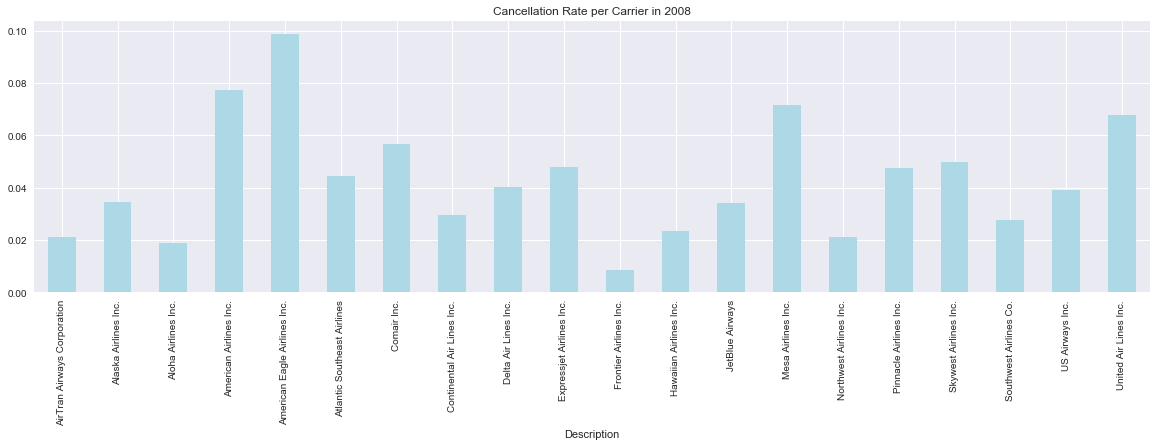

In [21]:
# visualization of cancellation rate per Carrier 
proportional_cancellations_g.plot(kind='bar', stacked=False,color ='lightblue', figsize=[20,5],title ="Cancellation Rate per Carrier in 2008")
plt.show()

### Calculation of the cancellation Reasons per Month and visualisation 

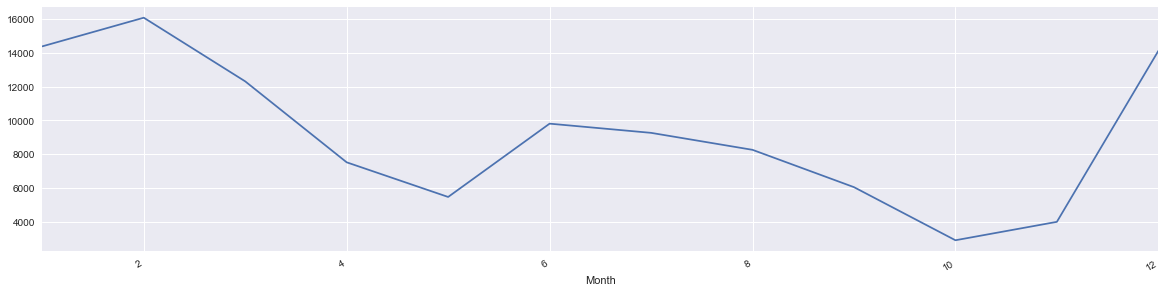

In [22]:
# Cancellations by month.
grouped_carrier = df.groupby(by=[ 'Month'])
sum_cancellations = grouped_carrier['Cancelled'].sum() 
sum_cancellations.plot(subplots=True, figsize=(20,5))
plt.show()

In [23]:
def getCodes(dataFrame):
    result = {}
    for month in range(1,13):
        preDF = dataFrame[dataFrame['Month'] == month]
        result[month] = {}
        result[month]['A'] = len(preDF[preDF['CancellationCode'] == 'A'])
        result[month]['B'] = len(preDF[preDF['CancellationCode'] == 'B'])
        result[month]['C'] = len(preDF[preDF['CancellationCode'] == 'C'])
        result[month]['D'] = len(preDF[preDF['CancellationCode'] == 'D'])
    return pd.DataFrame().from_dict(result, orient= 'index')

codeDF = getCodes(df)
codeDF

,A,B,C,D
1,6106,5080,3181,0
2,5693,6773,3587,2
3,5395,4719,2184,4
4,4890,1277,1364,0
5,2980,1158,1348,3
6,4023,2974,2813,0
7,4763,2220,2285,0
8,3653,2703,1911,0
9,2110,2966,990,1
10,1947,522,468,0


### Cancellation Reasons per Month 

From this graph, we see a trend to increasing cancellation rate during the summer and winter holiday season. It would be nice to investigate on the reasons behind the cancellations. 

There is a clear peak in the cancellation rate in the winter month, which is reasonable. Bad weather with Ice and Snow can lead to a high cancellation rate. Whereas the light peak in June needs to be further investigated. 

The assumption of bad weather having influence on the cancellation rate in winter looks as if it is highly correlated to the winter months.  Whereas the peak in summer is more due carrier reasons whatever that means, weather and NAS are involved as well wehreas security reasons influence is nearly Null. 


A = carrier, B= weather, C=NAS, D = security



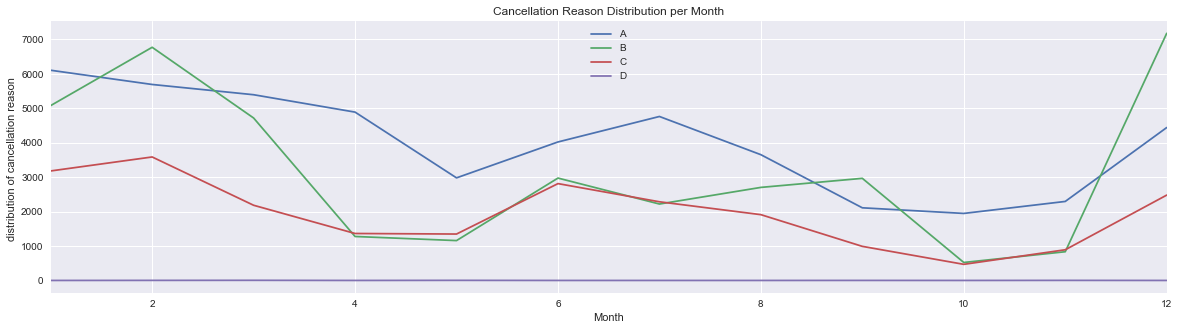

In [24]:
codeDF.plot(subplots=False, figsize=(20,5))
plt.ylabel('distribution of cancellation reason ')
plt.xlabel('Month')
plt.title('Cancellation Reason Distribution per Month')
plt.show()

Additional information provied for the breakdown on Airline Cancellation Codes in the following code snippet. A dictionary per Airline is delivered containing the Cancellation reasons. 

In [25]:
# Cancellations by carrier and month.
def getCodesWithAirline(dataFrame):
    result = {}
    for month in range(1,13):
        preDF1 = dataFrame[dataFrame['Month'] == month]
        result[month] = {}
        for airline in set(preDF1['Description']):
            result[month][airline] = {}
            preDF2 = preDF1[preDF1['Description'] == airline]
            
            result[month][airline]['A'] = len(preDF2[preDF2['CancellationCode'] == 'A'])
            result[month][airline]['B'] = len(preDF2[preDF2['CancellationCode'] == 'B'])
            result[month][airline]['C'] = len(preDF2[preDF2['CancellationCode'] == 'C'])
            result[month][airline]['D'] = len(preDF2[preDF2['CancellationCode'] == 'D'])
    return pd.DataFrame().from_dict(result, orient='index')

airline_code= getCodesWithAirline(df)
airline_code


,American Airlines Inc.,Skywest Airlines Inc.,American Eagle Airlines Inc.,Southwest Airlines Co.,Comair Inc.,Hawaiian Airlines Inc.,Pinnacle Airlines Inc.,Frontier Airlines Inc.,Continental Air Lines Inc.,United Air Lines Inc.,Atlantic Southeast Airlines,JetBlue Airways,Mesa Airlines Inc.,Expressjet Airlines Inc.,Northwest Airlines Inc.,US Airways Inc.,AirTran Airways Corporation,Delta Air Lines Inc.,Alaska Airlines Inc.,Aloha Airlines Inc.
1,"{'A': 750, 'B': 287, 'C': 376, 'D': 0}","{'A': 440, 'B': 587, 'C': 955, 'D': 0}","{'A': 441, 'B': 709, 'C': 776, 'D': 0}","{'A': 617, 'B': 248, 'C': 89, 'D': 0}","{'A': 174, 'B': 267, 'C': 0, 'D': 0}","{'A': 27, 'B': 0, 'C': 0, 'D': 0}","{'A': 718, 'B': 268, 'C': 70, 'D': 0}","{'A': 3, 'B': 9, 'C': 0, 'D': 0}","{'A': 30, 'B': 125, 'C': 4, 'D': 0}","{'A': 796, 'B': 275, 'C': 166, 'D': 0}","{'A': 134, 'B': 764, 'C': 5, 'D': 0}","{'A': 175, 'B': 0, 'C': 0, 'D': 0}","{'A': 750, 'B': 306, 'C': 261, 'D': 0}","{'A': 74, 'B': 235, 'C': 231, 'D': 0}","{'A': 75, 'B': 105, 'C': 62, 'D': 0}","{'A': 334, 'B': 86, 'C': 117, 'D': 0}","{'A': 51, 'B': 144, 'C': 19, 'D': 0}","{'A': 271, 'B': 578, 'C': 31, 'D': 0}","{'A': 223, 'B': 87, 'C': 19, 'D': 0}","{'A': 23, 'B': 0, 'C': 0, 'D': 0}"
2,"{'A': 672, 'B': 652, 'C': 343, 'D': 0}","{'A': 337, 'B': 572, 'C': 751, 'D': 0}","{'A': 447, 'B': 894, 'C': 794, 'D': 0}","{'A': 591, 'B': 565, 'C': 88, 'D': 0}","{'A': 124, 'B': 713, 'C': 7, 'D': 0}","{'A': 11, 'B': 0, 'C': 0, 'D': 0}","{'A': 647, 'B': 414, 'C': 115, 'D': 0}","{'A': 3, 'B': 26, 'C': 0, 'D': 0}","{'A': 52, 'B': 227, 'C': 1, 'D': 0}","{'A': 460, 'B': 481, 'C': 230, 'D': 0}","{'A': 193, 'B': 282, 'C': 53, 'D': 2}","{'A': 29, 'B': 260, 'C': 0, 'D': 0}","{'A': 1224, 'B': 342, 'C': 378, 'D': 0}","{'A': 73, 'B': 583, 'C': 379, 'D': 0}","{'A': 131, 'B': 183, 'C': 149, 'D': 0}","{'A': 299, 'B': 124, 'C': 149, 'D': 0}","{'A': 72, 'B': 148, 'C': 28, 'D': 0}","{'A': 181, 'B': 245, 'C': 110, 'D': 0}","{'A': 130, 'B': 62, 'C': 12, 'D': 0}","{'A': 17, 'B': 0, 'C': 0, 'D': 0}"
3,"{'A': 784, 'B': 702, 'C': 161, 'D': 0}","{'A': 366, 'B': 391, 'C': 384, 'D': 0}","{'A': 375, 'B': 878, 'C': 421, 'D': 4}","{'A': 436, 'B': 217, 'C': 33, 'D': 0}","{'A': 184, 'B': 467, 'C': 3, 'D': 0}","{'A': 16, 'B': 0, 'C': 0, 'D': 0}","{'A': 743, 'B': 200, 'C': 156, 'D': 0}","{'A': 6, 'B': 25, 'C': 0, 'D': 0}","{'A': 89, 'B': 170, 'C': 14, 'D': 0}","{'A': 541, 'B': 217, 'C': 64, 'D': 0}","{'A': 197, 'B': 119, 'C': 118, 'D': 0}","{'A': 64, 'B': 96, 'C': 26, 'D': 0}","{'A': 333, 'B': 112, 'C': 209, 'D': 0}","{'A': 210, 'B': 715, 'C': 306, 'D': 0}","{'A': 172, 'B': 84, 'C': 70, 'D': 0}","{'A': 358, 'B': 58, 'C': 83, 'D': 0}","{'A': 74, 'B': 102, 'C': 38, 'D': 0}","{'A': 377, 'B': 155, 'C': 94, 'D': 0}","{'A': 70, 'B': 11, 'C': 4, 'D': 0}",NaN
4,"{'A': 1542, 'B': 105, 'C': 71, 'D': 0}","{'A': 294, 'B': 189, 'C': 157, 'D': 0}","{'A': 275, 'B': 305, 'C': 326, 'D': 0}","{'A': 461, 'B': 0, 'C': 19, 'D': 0}","{'A': 74, 'B': 163, 'C': 15, 'D': 0}","{'A': 13, 'B': 0, 'C': 0, 'D': 0}","{'A': 373, 'B': 57, 'C': 64, 'D': 0}","{'A': 7, 'B': 0, 'C': 0, 'D': 0}","{'A': 48, 'B': 32, 'C': 4, 'D': 0}","{'A': 458, 'B': 122, 'C': 44, 'D': 0}","{'A': 29, 'B': 17, 'C': 68, 'D': 0}","{'A': 43, 'B': 53, 'C': 28, 'D': 0}","{'A': 405, 'B': 84, 'C': 218, 'D': 0}","{'A': 30, 'B': 49, 'C': 196, 'D': 0}","{'A': 118, 'B': 29, 'C': 49, 'D': 0}","{'A': 306, 'B': 18, 'C': 42, 'D': 0}","{'A': 81, 'B': 8, 'C': 31, 'D': 0}","{'A': 210, 'B': 25, 'C': 32, 'D': 0}","{'A': 123, 'B': 21, 'C': 0, 'D': 0}",NaN
5,"{'A': 570, 'B': 271, 'C': 97, 'D': 2}","{'A': 153, 'B': 88, 'C': 168, 'D': 0}","{'A': 314, 'B': 361, 'C': 334, 'D': 0}","{'A': 291, 'B': 16, 'C': 27, 'D': 0}","{'A': 34, 'B': 138, 'C': 0, 'D': 0}","{'A': 11, 'B': 0, 'C': 0, 'D': 0}","{'A': 133, 'B': 45, 'C': 14, 'D': 1}","{'A': 7, 'B': 2, 'C': 0, 'D': 0}","{'A': 39, 'B': 29, 'C': 6, 'D': 0}","{'A': 492, 'B': 57, 'C': 110, 'D': 0}","{'A': 51, 'B': 0, 'C': 5, 'D': 0}","{'A': 12, 'B': 12, 'C': 2, 'D': 0}","{'A': 288, 'B': 27, '

### Evaluation of the no of flights by Month 

In [26]:
# no of flights 
monthly_flights = df.groupby(by=['Month'])
g =monthly_flights.size()
#g

In [27]:
# monthly cancellation rate 
grouped_m = df.groupby(by=['Month'])
prop_m = (grouped_m['Cancelled'].sum() / grouped_m.size())
#prop_m

In [28]:
frames = [g, prop_m]
df42 = pd.concat(frames, axis=1)
df42['flights']= df42[0]
df42['can_rate']= df42[1]
#df42.drop('month')
df42.pop (0)
df42.pop (1)
df42

,flights,can_rate
Month,,
1,207605,0.069204
2,195645,0.082062
3,207057,0.059414
4,193738,0.038872
5,197939,0.027731
6,199699,0.049124
7,205536,0.045092
8,201651,0.040997
9,174747,0.034719


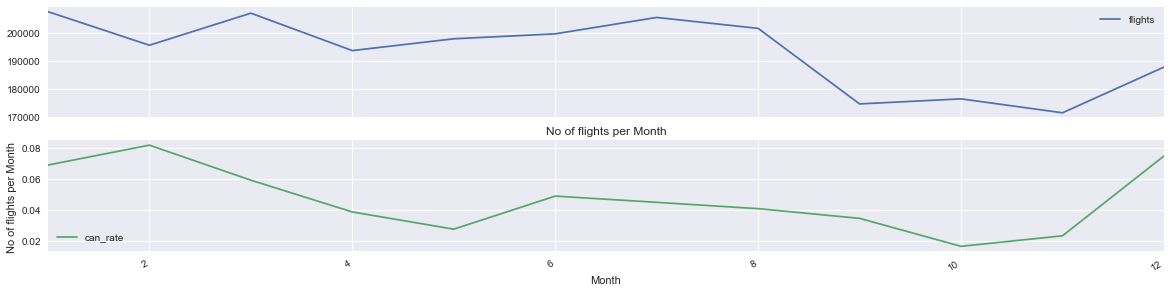

In [29]:
df42.plot(subplots=True, figsize=(20,5))
plt.ylabel('No of flights per Month ')
plt.xlabel('Month')
plt.title('No of flights per Month')
plt.show()

### Calculation of airport departures 

In [30]:
#airport view - Top 10 Airports  Departures
dest = df.groupby(by=['Origin'])
d =dest.size()
d.sort_values (ascending = False)[:10]


Origin
ATL    114718
ORD    112165
DEN     79867
DFW     62758
DTW     58419
PHX     57092
IAH     54906
LAX     52796
SLC     51591
LAS     50023
dtype: int64

### Calculation of Airport Arrivals

In [31]:
#airport view - Top 10 Airports Arrivals 
dest = df.groupby(by=['Dest'])
d2 =dest.size()
d2.sort_values (ascending = False)[:10]


Dest
ATL    115557
ORD    112556
DEN     79805
DFW     63180
DTW     58362
PHX     57814
IAH     55045
LAX     53022
SLC     51808
MSP     50065
dtype: int64

In [32]:
airport_data= pd.read_csv('airports.csv')

In [33]:
airport_data


,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
5,01M,Tishomingo County,Belmont,MS,USA,34.491667,-88.201111
6,02A,Gragg-Wade,Clanton,AL,USA,32.850487,-86.611453
7,02C,Capitol,Brookfield,WI,USA,43.087510,-88.177869
8,02G,Columbiana County,East Liverpool,OH,USA,40.673313,-80.641406
9,03D,Memphis Memorial,Memphis,MO,USA,40.447259,-92.226961


### summarization of arrivals and departures 

In [34]:
#ap = pd.concat ([d,d2], axis = 'columns')
dframes2 = [d, d2]
df_airport = pd.concat(dframes2, axis=1)

df_airport ['departures']= df_airport[0]
df_airport ['arrivals']= df_airport[1]
df_airport ['sum']= df_airport ['departures']+df_airport ['arrivals']

df_airport.pop (0)
df_airport.pop (1)

df_airport


,departures,arrivals,sum
ABE,2611.0,2540.0,5151.0
ABI,399.0,392.0,791.0
ABQ,15499.0,15467.0,30966.0
ABY,381.0,380.0,761.0
ACK,271.0,273.0,544.0
ACT,420.0,404.0,824.0
ACV,1383.0,1360.0,2743.0
ACY,115.0,113.0,228.0
ADK,102.0,102.0,204.0
ADQ,398.0,396.0,794.0


In [35]:
airport_data.index = airport_data['iata']

In [36]:
airport_total = pd.merge(df_airport, airport_data, how='inner', left_on =None , right_on=None,
         left_index=True, right_index=True, sort=True,
         suffixes=('_x', '_y'), copy=True)
airport_total

,departures,arrivals,sum,iata,airport,city,state,country,lat,long
ABE,2611.0,2540.0,5151.0,ABE,Lehigh Valley International,Allentown,PA,USA,40.652363,-75.440402
ABI,399.0,392.0,791.0,ABI,Abilene Regional,Abilene,TX,USA,32.411320,-99.681897
ABQ,15499.0,15467.0,30966.0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
ABY,381.0,380.0,761.0,ABY,Southwest Georgia Regional,Albany,GA,USA,31.535515,-84.194473
ACK,271.0,273.0,544.0,ACK,Nantucket Memorial,Nantucket,MA,USA,41.253052,-70.060181
ACT,420.0,404.0,824.0,ACT,Waco Regional,Waco,TX,USA,31.611288,-97.230519
ACV,1383.0,1360.0,2743.0,ACV,Arcata,Arcata/Eureka,CA,USA,40.978115,-124.108619
ACY,115.0,113.0,228.0,ACY,Atlantic City International,Atlantic City,NJ,USA,39.457583,-74.577167
ADK,102.0,102.0,204.0,ADK,Adak,Adak,AK,USA,51.877964,-176.646031
ADQ,398.0,396.0,794.0,ADQ,Kodiak,Kodiak,AK,USA,57.749968,-152.493855


### Top 10 busiest Airports 

In [37]:
airport_total.sort_values (by=['sum'], ascending = False)[:10]

,departures,arrivals,sum,iata,airport,city,state,country,lat,long
ATL,114718.0,115557.0,230275.0,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
ORD,112165.0,112556.0,224721.0,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
DEN,79867.0,79805.0,159672.0,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002
DFW,62758.0,63180.0,125938.0,DFW,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200
DTW,58419.0,58362.0,116781.0,DTW,Detroit Metropolitan-Wayne County,Detroit,MI,USA,42.212059,-83.348836
PHX,57092.0,57814.0,114906.0,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056
IAH,54906.0,55045.0,109951.0,IAH,George Bush Intercontinental,Houston,TX,USA,29.980472,-95.339722
LAX,52796.0,53022.0,105818.0,LAX,Los Angeles International,Los Angeles,CA,USA,33.942536,-118.408074
SLC,51591.0,51808.0,103399.0,SLC,Salt Lake City Intl,Salt Lake City,UT,USA,40.788388,-111.977773
MSP,49813.0,50065.0,99878.0,MSP,Minneapolis-St Paul Intl,Minneapolis,MN,USA,44.880547,-93.216922


In [38]:
#export cancellation rate for java treatment
df42.to_csv('can_rate.csv')

In [39]:
airport_total.to_csv ('airport_total.csv')

In [42]:
from IPython.display import HTML
from IPython.display import display
HTML(filename='FlightCancellationDataCarrier.html')

In [43]:
HTML(filename='FlightCancellationData_Month.html')

https://public.tableau.com/profile/michaela.lueck#!/vizhome/Flights2008airports/Blatt1